In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from sklearn.preprocessing impor


In [ ]:
#Loading train data
train_data=pd.read_csv("train_data.csv")
train_data.sample(10)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
train_data.describe()

In [202]:
#Checking dtypes of data columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
#checking for total number of records and features
train_data.shape

In [ ]:
#checking for null values
train_data.isnull().sum()

In [45]:
# Separating object type and numberic data types feature
num_data=train_data.select_dtypes(exclude='object')
cat_data=train_data.select_dtypes(include='object')

In [ ]:
num_data.head()

In [ ]:
num_data.describe()

In [ ]:
cat_data.head()

In [ ]:
#checking total how many records has claimed insurance
num_data['is_claim'].value_counts()

In [ ]:
train_data['age_of_car'].value_counts()

In [ ]:
old_car=[]
new_car=[]
for car_age in num_data['age_of_car']:
  if car_age>0.16:
    old_car.append(car_age)
  else:
    new_car.append(car_age)

    
  
print(len(old_car))
print(len(new_car))

In [ ]:
train_data['segment'].unique()

In [ ]:
train_data['make'].unique()

In [ ]:
train_data.plot(x='make', y='is_claim', style='o')

In [ ]:
train_data.head()

In [ ]:
train_data['transmission_type']

In [ ]:
# checking for segment unique records
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['segment']=le.fit(train_data['segment'])
print(train_data['segment'].value_counts())

LabelEncoder()    58592
Name: segment, dtype: int64


In [ ]:
train_data['model'].unique()

array(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11'],
      dtype=object)

In [ ]:
train_data['fuel_type'].unique()

array(['CNG', 'Petrol', 'Diesel'], dtype=object)

In [70]:
train_data['rear_brakes_type'].unique()

array(['Drum', 'Disc'], dtype=object)

In [71]:
train_data['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
print(cat_data.columns)

In [51]:
non_bool_cat_col = [col for col in cat_data.columns if not col.startswith('is')]
print(len(cat_data.columns))
print(len(non_bool_cat_col))

28
11


In [52]:
print(non_bool_cat_col)

['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'rear_brakes_type', 'transmission_type', 'steering_type']


In [ ]:
cat_data['area_cluster'].unique()

In [55]:
cat_data = cat_data.drop('policy_id', axis=1)

In [72]:
# Plot histogram with #unique_vals for each cat column
col_names = []
unique_count = []
for col in cat_data.columns:
  if not (col.startswith('is')):
    col_names.append(col)
    unique_count.append(len(cat_data[col].unique()))

In [74]:
print(col_names)
print(unique_count)

['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'rear_brakes_type', 'transmission_type', 'steering_type']
[22, 6, 11, 3, 9, 9, 11, 2, 2, 3]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

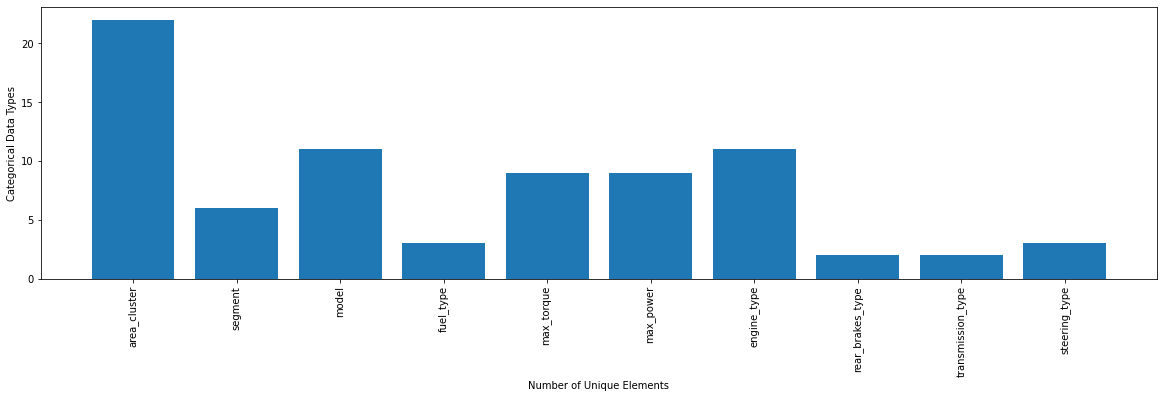

In [69]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)

plt.figure(figsize=(20,5))

plt.bar(col_names, height=unique_count)
plt.ylabel('Categorical Data Types')
plt.xlabel('Number of Unique Elements');
plt.xticks(rotation=90)

In [205]:
train_features = train_data.drop('is_claim', axis=1)
target = train_data.is_claim

train_features = train_features.drop('policy_id', axis=1)

In [206]:
train_features.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],
      dtype='object')

In [207]:
# Separating object type and numberic data types feature
num_data=train_features.select_dtypes(exclude='object')
cat_data=train_features.select_dtypes(include='object')
# print(len(cat_data.columns), len(num_data.columns))

In [208]:
#Numerical Columns
norm_cols = ['policy_tenure', 'age_of_car', 'age_of_policyholder']
cols_to_norm = ['population_density', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating']
cols_to_norm.extend(norm_cols)
one_hot_columns = ["make"]

In [209]:
cols_to_norm

['population_density',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'policy_tenure',
 'age_of_car',
 'age_of_policyholder']

In [210]:
print(train_features["make"].value_counts())

1    38126
3    14018
2     2373
5     2114
4     1961
Name: make, dtype: int64


In [211]:
# Converting the boolean columns to binary columns
for column in train_features.columns:
  if(column.startswith('is')):
    train_features[column] = train_features[column].apply(lambda x: 1 if x=='Yes' else 0)

In [212]:
# Plot histogram with #unique_vals for each cat column
col_names = []
unique_count = []
for col in cat_data.columns:
  if not (col.startswith('is')):
    col_names.append(col)
    unique_count.append(len(train_features[col].unique()))

In [213]:
# As make is also categorical 
col_names.append(one_hot_columns[0])
unique_count.append(len(train_features[one_hot_columns[0]].unique()))

In [214]:
print(col_names)
print(unique_count, sum(unique_count))

['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'rear_brakes_type', 'transmission_type', 'steering_type', 'make']
[22, 6, 11, 3, 9, 9, 11, 2, 2, 3, 5] 83


In [215]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
train_features[col_names] = train_features[col_names].apply(lambda col: le.fit_transform(col))    


from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(train_features[col_names]).toarray()

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=train_features.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = train_features.drop(columns=col_names)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [216]:
print(len(data_other_cols.columns))
print(len(data_hot_encoded.columns))
print(len(data_out.columns))

31
83
114


In [217]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_train_features = pd.DataFrame(
    scaler.fit_transform(train_features[cols_to_norm]),
    columns = cols_to_norm
)

In [218]:
len(normalized_train_features.columns)

14

In [219]:
#Concatenate the two dataframes : 
final_data = pd.concat([normalized_train_features, data_out], axis=1)

In [220]:
len(final_data.columns)

128

In [ ]:
final_data.info()

In [204]:
final_data.isnull().sum()

population_density                  0
airbags                             0
displacement                        0
cylinder                            0
gear_box                            0
                                   ..
is_driver_seat_height_adjustable    0
is_day_night_rear_view_mirror       0
is_ecw                              0
is_speed_alert                      0
ncap_rating                         0
Length: 128, dtype: int64

In [225]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_data, target,
                                                 test_size = 0.3,
                                                 random_state = 42)

In [226]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(41014, 128) (41014,)
(17578, 128) (17578,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 40, random_state = 42)
clf.fit(x_train, y_train)

In [ ]:
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

In [248]:
from sklearn import metrics

print(metrics.accuracy_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_test, y_pred_test))

0.9994148339591359
0.8713733075435203


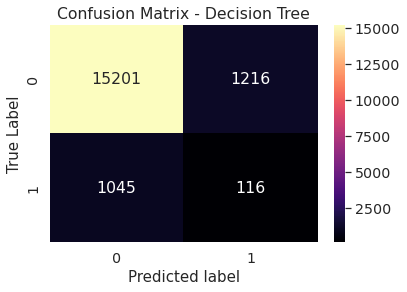

<Figure size 720x504 with 0 Axes>

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            y_pred_test)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
# ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
# ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [256]:
corr_data = pd.concat([normalized_train_features, target], axis=1)

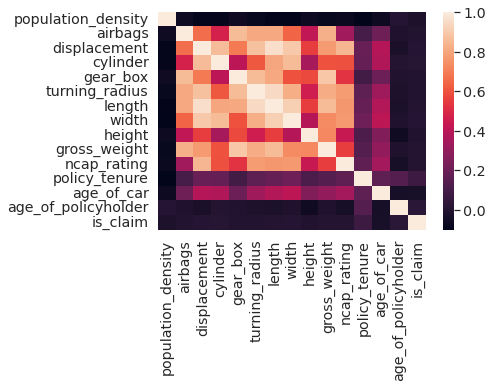

In [258]:
import seaborn as sns
sns.heatmap(corr_data.corr(),
                xticklabels=corr_data.columns,
                yticklabels=corr_data.columns)